<a href="https://colab.research.google.com/github/manojnahak02/PIMA_Diabetes_Prediction/blob/master/PIMA_Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#To predict diabetes using PIMA diabetes data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# from google.colab import files
# uploaded=files.upload()

Saving pima-data.csv to pima-data.csv


In [0]:
file = r'/content/drive/My Drive/Colab Notebooks/Diabetes Prediction/pima-data.csv'
data=pd.read_csv(file)

In [0]:
# import io

In [0]:
# data = pd.read_csv(io.BytesIO(uploaded['pima-data.csv']))

In [0]:
data.describe

<bound method NDFrame.describe of      num_preg  glucose_conc  diastolic_bp  ...  age    skin  diabetes
0           6           148            72  ...   50  1.3790      True
1           1            85            66  ...   31  1.1426     False
2           8           183            64  ...   32  0.0000      True
3           1            89            66  ...   21  0.9062     False
4           0           137            40  ...   33  1.3790      True
..        ...           ...           ...  ...  ...     ...       ...
763        10           101            76  ...   63  1.8912     False
764         2           122            70  ...   27  1.0638     False
765         5           121            72  ...   30  0.9062     False
766         1           126            60  ...   47  0.0000      True
767         1            93            70  ...   23  1.2214     False

[768 rows x 10 columns]>

In [0]:
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [0]:
# check if any null value is present
data.isnull().values.any()

False

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


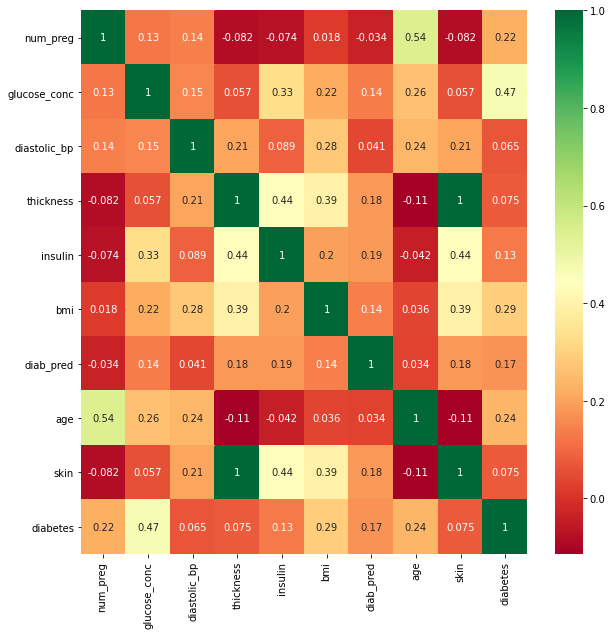

In [0]:
  #correlation
  import seaborn as sns

  #get correlation of each features in dataset
  corr_mat = data.corr()
  top_corr_features=corr_mat.index
  plt.figure(figsize=(10,10))

  #plot Heat Map
  g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [0]:
data.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [0]:
#Changing the diabetes column data from boolean to number using map function
diabetes_map = {True: 1, False: 0}
data['diabetes'] = data['diabetes'].map(diabetes_map)

In [0]:
data.head(4)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0


In [0]:
#To check the dataset is balanced or not
diabetes_true_count = len(data.loc[data['diabetes']==True])
diabetes_false_count = len(data.loc[data['diabetes']==False])

In [0]:
(diabetes_true_count, diabetes_false_count)

(268, 500)

In [0]:
#Train Test Split
from sklearn.model_selection import train_test_split
feature_columns = ['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi', 'diab_pred', 'age', 'skin']
predicted_column = ['diabetes']

In [0]:
x = data[feature_columns].values
y = data[predicted_column].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state=10)

In [0]:
#Check how many other missing(zero) values
print("Total rows: {0}".format(len(data)))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(data.loc[data['diastolic_bp'] == 0])))
print("number of rows missing insulin: {0}".format(len(data.loc[data['insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(data.loc[data['bmi'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(data.loc[data['diab_pred'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['age'] == 0])))
print("number of rows missing skin: {0}".format(len(data.loc[data['skin'] == 0])))

Total rows: 768
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 227


In [0]:
#!pip install -q sklearn-venn

In [0]:
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values=np.nan, strategy="mean")

x_train = fill_values.fit_transform(x_train)
x_test = fill_values.fit_transform(x_test)

In [0]:
#Apply Algorithm
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

#ravel() function is used to create a contiguous flattened array, single line output & to avoid warning msg
random_forest_model.fit(x_train, y_train.ravel()) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [0]:
#Predicting on X_test data
predict_train_data = random_forest_model.predict(x_test)
from sklearn import metrics
print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test,predict_train_data)))

Accuracy = 0.749


In [0]:
#Similarly another algoritm (XG-Boost) is applied to check the accuracy score

In [0]:
#Taken some parameters using some Hyper parameter optimization
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [0]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [0]:
classifier = xgboost.XGBClassifier()

In [0]:
random_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [0]:
#Timer finction will give us the time taken by RandomizedSerchCV to run
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [0]:
from datetime import datetime
#here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x_train,y_train.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



 Time taken: 0 hours 0 minutes and 2.26 seconds.


[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:    2.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.2s finished


In [0]:
random_search.best_estimator_
#paste the output below to create classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
classifier.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred=classifier.predict(x_test)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
score=accuracy_score(y_test,y_pred)

print(cm)
print(score)

[[124  20]
 [ 38  49]]
0.7489177489177489


In [0]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
#cross val score
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,x_train,y_train.ravel(),cv=10)

In [0]:
#as our cv=10, so there will be 10 accuracy score
score

array([0.74074074, 0.83333333, 0.7962963 , 0.75925926, 0.75925926,
       0.74074074, 0.7962963 , 0.67924528, 0.75471698, 0.79245283])

In [0]:
#take mean value of those 10 accuracy score
score.mean()

0.765234102026555